< Part 3 >
- [DataManim의 3유형 연습문제](https://www.datamanim.com/dataset/03_dataq/typethree.html)
- scipy(통계 분석)
  - t-test
  - 정규성 검정
  - 카이제곱 검정
  - ANOVA

### 정규성 검정
- stats.shapiro()

#### 1)정규성 검정(1)

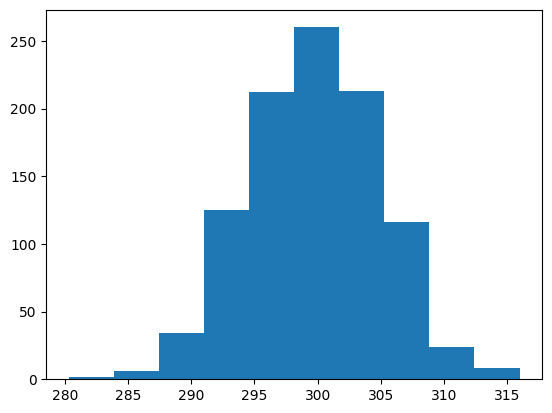

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [2]:
# 그래프상 정규분포 따름
from scipy.stats import shapiro
from scipy import stats
stat, p_val = stats.shapiro(df)

# 결과
print("shapiro 통계량: ", stat)
print("p_value: ", p_val)
if p_val < 0.05:
  print("reject h0, 정규분포 따르지 않음")
else:
  print("can not reject h0, 정규분포 따름")

shapiro 통계량:  0.9981433805517037
p_value:  0.3479659233067207
can not reject h0, 정규분포 따름


#### 2)정규성 검정(2)

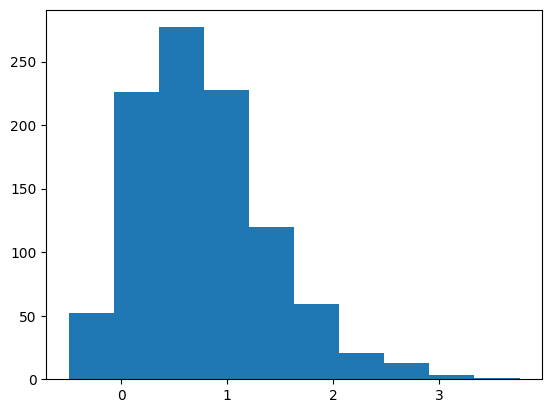

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [4]:
# 그래프에서 로그 취하면 정규성 따를 듯
from scipy import stats
from scipy.stats import shapiro

stat, p_val = stats.shapiro(df)

print("stat : ", stat)
print("p_val:", p_val)
if p_val < 0.05:
  print("reject h0 정규성을 만족하지 않음")
else:
  print("can not reject h0 정규성을 만족함")

stat :  0.9578887230674165
p_val: 2.309852860177995e-16
reject h0 정규성을 만족하지 않음


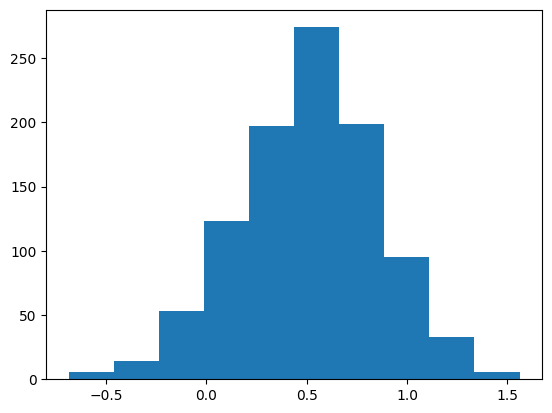

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 위의 데이터를 로그취한다.
df_log = np.log1p(df)
plt.hist(df_log)
plt.show()

In [6]:
# df_log로 정규성 재검정
stat, p_val = stats.shapiro(df_log)
print("stat : ", stat)
print("p_val:", p_val)
if p_val < 0.05:
  print("reject h0 정규성을 만족하지 않음")
else:
  print("can not reject h0 정규성을 만족함")

stat :  0.9976879570377132
p_val: 0.17513126966862336
can not reject h0 정규성을 만족함


#### 3.)정규성 검정(3)

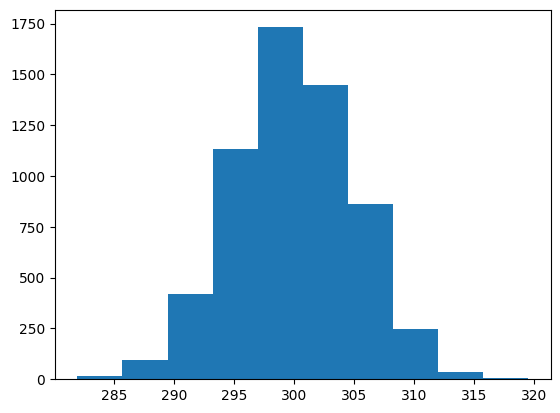

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [8]:
# 딱 보면 정규성을 만족할 것 같음
from scipy.stats import shapiro
stat, p_val = stats.shapiro(df)

print("statisitc : ", stat)
print("p_val : ", p_val)
if p_val < 0.05:
  print("reject h0 정규성을 만족하지 않음")
else:
  print("can not reject h0 정규성을 만족함")

statisitc :  0.9995353804150279
p_val :  0.15046155392344363
can not reject h0 정규성을 만족함


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


### 단일 표본 t 검정

#### 1)100명의 키 정보가 들어 있는 데이터
- 데이터가 정규성을 만족하는지
- 평균키는 165라 판단할수 있는지

In [9]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

In [10]:
# 데이터 정규성 만족?
from scipy.stats import shapiro
stat, p_val = shapiro(df['height'])

print("statisitc : ", stat)
print("p_val : ", p_val)
if p_val < 0.05:
  print("reject h0, 정규성 만족 안함")
else:
  print("can not reject h0, 정규성 만족")

statisitc :  0.9872671038154957
p_val :  0.45583339816328994
can not reject h0, 정규성 만족


In [11]:
# 평균키가 165인지 검정
from scipy.stats import ttest_1samp

stats, p_val = ttest_1samp(df['height'], popmean=165)
print("statisitc : ", stats)
print("p_value: ",p_val)
if p_val < 0.05:
  print("reject h0, 키 평균은 165가 아님")
else:
  print("can not reject h0, 키 평균은 165")

statisitc :  3.2017884987150644
p_value:  0.0018367171548080209
reject h0, 키 평균은 165가 아님


In [12]:
from scipy.stats import ttest_1samp
# help(ttest_1samp)

#### 2)같은 문제 다른 데이터

In [13]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [15]:
from scipy.stats import shapiro, ttest_1samp, wilcoxon

# 1) 정규성 검정
stat, p_val = shapiro(df['height'])
print("Shapiro p:", p_val)

# 2) 정규성에 따라 올바른 검정 선택
if p_val < 0.05:
    print("정규성 없음 → Wilcoxon 비모수 검정 수행")
    stat2, p_val2 = wilcoxon(df['height'] - 165)
    print("Wilcoxon p:", p_val2)

    if p_val2 < 0.05:
        print("귀무가설 기각 → 평균은 165가 아니다.")
    else:
        print("귀무가설 기각 못함 → 평균은 165라고 볼 수 있다.")

else:
    print("정규성 있음 → 단일표본 t-test 수행")
    stat2, p_val2 = ttest_1samp(df['height'], 165)
    print("t-test p:", p_val2)

    if p_val2 < 0.05:
        print("귀무가설 기각 → 평균은 165가 아니다.")
    else:
        print("귀무가설 기각 못함 → 평균은 165이다.")

Shapiro p: 0.013552123212013873
정규성 없음 → Wilcoxon 비모수 검정 수행
Wilcoxon p: 0.04880534424649582
귀무가설 기각 → 평균은 165가 아니다.


### 등분산 검정

#### 1)등분산 검정 - 그룹간 성적
- 두개 학급의 시험성적에 대한 데이터이다. 그룹간 등분산 검정을 실행하라

In [16]:
import pandas as pd
import numpy as np
import scipy
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [17]:
# 등분산 검정
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(bartlett(a,b))


print(fligner(a,b,center='median')) #default
print(fligner(a,b,center='mean'))

print(levene(a,b, center='median')) #default
print(levene(a,b,center='mean'))

# 아래 결과의 p_val < 0.05 이면 h0기각

BartlettResult(statistic=np.float64(1.655460761556632), pvalue=np.float64(0.19821731887086189))
FlignerResult(statistic=np.float64(0.7281251154135562), pvalue=np.float64(0.39349158741002765))
FlignerResult(statistic=np.float64(0.8272211734319945), pvalue=np.float64(0.36307728836821906))
LeveneResult(statistic=np.float64(0.3145466542912649), pvalue=np.float64(0.5751662820554713))
LeveneResult(statistic=np.float64(0.5086970687685527), pvalue=np.float64(0.4760514837800255))


#### 2)등분산 검정 - 그룹간 성적

In [18]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [19]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(bartlett(a,b))


print(fligner(a,b,center='median')) #default
print(fligner(a,b,center='mean'))

print(levene(a,b, center='median')) #default
print(levene(a,b,center='mean'))

# 아래 결과의 p_val < 0.05 이면 h0기각

BartlettResult(statistic=np.float64(2.3634130008975087), pvalue=np.float64(0.12421017246883188))
FlignerResult(statistic=np.float64(4.960366756026232), pvalue=np.float64(0.025934706256615564))
FlignerResult(statistic=np.float64(4.94724457924667), pvalue=np.float64(0.026132286002684912))
LeveneResult(statistic=np.float64(4.307122424591436), pvalue=np.float64(0.03848734007752694))
LeveneResult(statistic=np.float64(4.342327020297874), pvalue=np.float64(0.0377066528874248))


#### 4)두 학급 성적에 대한 데이터

In [20]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [21]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df['A']
b = df['B']

print(bartlett(a,b))


print(fligner(a,b,center='median')) #default
print(fligner(a,b,center='mean'))

print(levene(a,b, center='median')) #default
print(levene(a,b,center='mean'))


BartlettResult(statistic=np.float64(2.973962508923144), pvalue=np.float64(0.08461436310212354))
FlignerResult(statistic=np.float64(5.124831619122788), pvalue=np.float64(0.023585858890699054))
FlignerResult(statistic=np.float64(6.08420814282746), pvalue=np.float64(0.01363954875460099))
LeveneResult(statistic=np.float64(5.147914610463281), pvalue=np.float64(0.023868975493455683))
LeveneResult(statistic=np.float64(5.783103950473267), pvalue=np.float64(0.016687980542371833))


In [22]:
# 다른 데이터
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [23]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

print(bartlett(df.A,df.B))
print(bartlett(df.A,df.B.dropna()))
print()

print(fligner(df.A,df.B))
print(fligner(df.A,df.B.dropna()))
print()

print(levene(df.A,df.B))
print(levene(df.A,df.B.dropna()))

# bartlett ,fligner 두 검정은 nan값을 지우고 사용해야한다. LeveneResult의 경우 nan값이 포함된다면 연산이 제대로 안된다

BartlettResult(statistic=np.float64(nan), pvalue=np.float64(nan))
BartlettResult(statistic=np.float64(3.024072692680794), pvalue=np.float64(0.08203720607748438))

FlignerResult(statistic=np.float64(nan), pvalue=np.float64(nan))
FlignerResult(statistic=np.float64(7.710320541528441), pvalue=np.float64(0.005490600130793619))

LeveneResult(statistic=np.float64(nan), pvalue=np.float64(nan))
LeveneResult(statistic=np.float64(8.008595918808284), pvalue=np.float64(0.004851565077063284))


### 독립표본 T검정
- 정규성 확인 : shapiro
- 정규성 -> 모수적 검정
- 정규성X -> 비모수적 검정

#### 1)두 학급 시험성적의 평균이 동일하다?

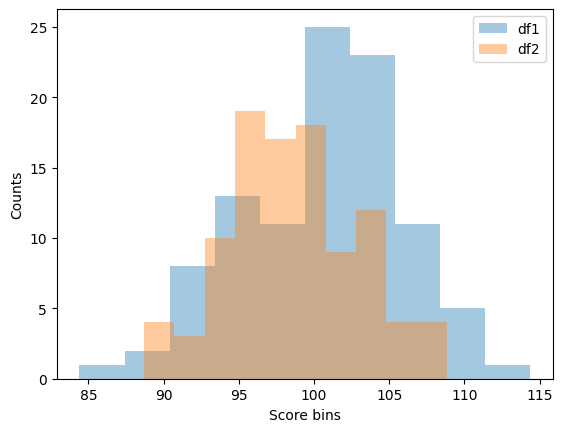

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [25]:
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import levene

# 정규성 검정
print(shapiro(df1))
print(shapiro(df2))

# 등분산 검정
print(levene(df1['data'], df2['data']))

# t-test
print("t-test : ", ttest_ind(df1, df2, equal_var = True))

ShapiroResult(statistic=np.float64(0.9860948333328381), pvalue=np.float64(0.3796835726350978))
ShapiroResult(statistic=np.float64(0.9901827646291556), pvalue=np.float64(0.6793743269084671))
LeveneResult(statistic=np.float64(2.5337683795339547), pvalue=np.float64(0.11302904824469096))
t-test :  TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


#### 2)두 시험 성적의 평균이 동일한가?

In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0
...,...,...
295,80,NaN
296,30,NaN
297,91,NaN
298,84,NaN


In [27]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, ranksums
print(shapiro(df['A']))
print(shapiro(df['B'].dropna())) # 정규성을 만족하지 않음

ShapiroResult(statistic=np.float64(0.9375393672524898), pvalue=np.float64(6.175255664337991e-10))
ShapiroResult(statistic=np.float64(0.9639432320175103), pvalue=np.float64(0.0001356810116492406))


In [28]:
# 두 그룹 중 한 그룹만 정규성을 위배해도 독립표본 t검정 진행 불가능
# 비모수 검정으로 진행해야 함
print(mannwhitneyu(df['A'], df['B'].dropna()))
print(ranksums(df['A'], df['B'].dropna()))

MannwhitneyuResult(statistic=np.float64(27036.0), pvalue=np.float64(0.9807458376150018))
RanksumsResult(statistic=np.float64(0.02446942170858557), pvalue=np.float64(0.9804781743503561))


#### 3)두 그룹의 평균이 동일한가?

In [38]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')
df

,a,b
0,121.023118,69.982090
1,69.740978,139.774624
2,93.737693,175.425924
3,100.331645,85.493555
4,75.048925,83.488953
...,...,...
115,97.955501,NaN
116,116.839209,NaN
117,88.257448,NaN
118,89.904714,NaN


In [39]:
df['b'].isna().sum()

np.int64(50)

In [40]:
a = df['b'].dropna()
b = df['a'].dropna()

# 정규성
from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=np.float64(0.985432512495046), pvalue=np.float64(0.5937526914945275))
ShapiroResult(statistic=np.float64(0.9865897179339467), pvalue=np.float64(0.2839111805144998))


In [42]:
# 등분산성
from scipy.stats import levene
print(levene(a, b))
# p_val < 0.05 -> h0 기각, 등분산 아님

LeveneResult(statistic=np.float64(3.9862856894158347), pvalue=np.float64(0.04731495612868527))


In [45]:
# t-test
# 등분산을 만족하지 않기 때문에, equal_var = False
from scipy.stats import ttest_ind
print(ttest_ind(a,b, equal_var = False))
# h0기각 불가능 -> 두 그룹의 평균은 동일하다고 볼 수 있음

TtestResult(statistic=np.float64(-0.0015963310698567184), pvalue=np.float64(0.9987289046092704), df=np.float64(122.72255248639058))


### paired t-test
- 전,후 데이터의 차이 비교 등
- ttest_rel
- h0:차이 없음, VS h1:차이 있음

#### 1)특정 질병 집단의 투약 전후의 혈류량 변화
- 투약 전후의 변화가 있는지 검정하라

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')
df.head()

,before,after
0,216.289726,175.897620
1,190.279454,189.295934
2,217.744689,219.233935
3,235.021264,195.021021
4,234.098484,213.218227


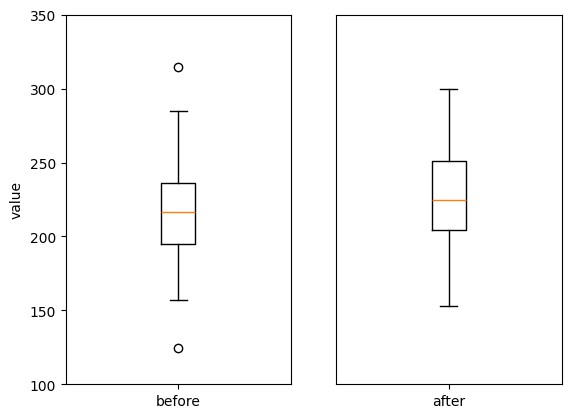

In [48]:
fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [50]:
before = df['before']
after = df['after']
# 차이, 대응 표본 t-test는 차이의 평균이 0인지 검정하는 것임
d = after - before

# 전, 후 데이터의 정규성 검증
from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=np.float64(0.9907895174016046), pvalue=np.float64(0.6065791087935604))
ShapiroResult(statistic=np.float64(0.9916963493176595), pvalue=np.float64(0.692386232128563))


In [54]:
# 전, 후 데이터의 등분산 검정
from scipy.stats import levene
print(levene(before, after))

LeveneResult(statistic=np.float64(0.06427968690211128), pvalue=np.float64(0.8000741651677987))


In [56]:
# t-test
# 정규성, 등분산성 만족
from scipy.stats import ttest_rel
print(ttest_rel(before, after))
# h0기각 -> 전후의 평균이 같다고 할 수 없다. 투약 전 후 변화가 생김

TtestResult(statistic=np.float64(-2.5535473487670677), pvalue=np.float64(0.011926744724546513), df=np.int64(119))


#### 2)특정 질병 집단의 투약 전후의 혈류량 변화2

In [57]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

In [60]:
before = df['before']
after = df['after']
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=np.float64(0.992063560687721), pvalue=np.float64(0.7270650360965547))
ShapiroResult(statistic=np.float64(0.9920193208528514), pvalue=np.float64(0.7229094514792909))


In [61]:
# 등분산?
from scipy.stats import levene
print(levene(before, after))

LeveneResult(statistic=np.float64(1.3463330638203617), pvalue=np.float64(0.24708279045237214))


In [63]:
# t-test
from scipy.stats import ttest_rel
print(ttest_rel(before, after))
# h0 기각 X -> 전후의 평균 같음, 투약 전 후 변화 없음

TtestResult(statistic=np.float64(0.188900575991026), pvalue=np.float64(0.8504925317234707), df=np.int64(119))


#### 3)학습 전 후 시험 성적 변화

In [64]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

In [67]:
before = df['before']
after = df['after']

# 정규성 검정
from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

# 등분산 검정
from scipy.stats import levene
print(levene(before, after))

ShapiroResult(statistic=np.float64(0.9173727585075375), pvalue=np.float64(0.0018973571840317808))
ShapiroResult(statistic=np.float64(0.9448970350592873), pvalue=np.float64(0.021140909861349116))
LeveneResult(statistic=np.float64(0.14329522146179022), pvalue=np.float64(0.7058456563194881))


In [69]:
# 정규성을 만족하지 않음
# t-test 불가능 -> wilcoxon 순위검정
from scipy.stats import wilcoxon
print(wilcoxon(before, after))
# 전 후 성적 변화 없음

WilcoxonResult(statistic=np.float64(437.0), pvalue=np.float64(0.12098409484052809))


#### 4)기계의 rpm값
- b상황이 a상황보다 rpm이 높다고 할 수 있는지
- h0: b<=a VS h1 : b>a


In [71]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

In [80]:
a = df[df['group']=='a'].rpm
b = df[df['group']=='b'].rpm

In [81]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=np.float64(0.9907215247460179), pvalue=np.float64(0.888420220853863))
ShapiroResult(statistic=np.float64(0.9846746597671578), pvalue=np.float64(0.5504989397841747))


In [82]:
# 등분산 검정
from scipy.stats import levene
print(levene(a, b))

LeveneResult(statistic=np.float64(0.06716114122680159), pvalue=np.float64(0.7959020864923277))


In [85]:
# t-test
from scipy.stats import ttest_rel
print(ttest_rel(a,b, alternative = "greater"))

TtestResult(statistic=np.float64(-1.9018108294460812), pvalue=np.float64(0.9693143365355352), df=np.int64(69))


### 카이제곱 검정(교차분석)
- 모분산 검정 -> **분산이 특정값인가**
- 독립성 검정(범주형 데이터) -> **두 범주형 변수는 독립인가**
- 일원카이제곱검정(chisquare), 카이제곱 적합도 검정 -> **관측값이 이론적 비율에 맞는가?**
- 이원카이제곱(chi2_contingency), 카이제곱독립성검정 -> **독립성 검정 활용**


#### 1)주사위의 분포에서 나올 가능성이 있는지? -> 카이제곱 적합도 검정

In [86]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

In [87]:
df

,dice_number,counts
0,1,24
1,2,20
2,3,28
3,4,22
4,5,28
5,6,22


In [89]:
from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype(int)
print(chisquare(df['counts'], df['expected']))

# h0 기각 불가능, 각 주사위의 눈금 발생 비율을 동일함

Power_divergenceResult(statistic=np.float64(2.333333333333333), pvalue=np.float64(0.8013589222076911))


#### 4)왼손잡이와 오른손잡이
- 비율은 0.2:0.8로 알려져있다. 적합한가?
- 관측도수, 기대도수, chisquare

In [90]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [100]:
# 관측도수
df_left = df[df['hands'] == 'left']
df_right = df[df['hands'] == 'right']
left_obs = df_left['hands'].value_counts()
right_obs = df_right['hands'].value_counts()
print(left_obs, right_obs)
f_obs = df['hands'].value_counts().reindex(['left', 'right'])
print(f_obs)

hands
left    80
Name: count, dtype: int64 hands
right    420
Name: count, dtype: int64
hands
left      80
right    420
Name: count, dtype: int64


In [102]:
# 기대도수
total =  len(df)
f_exp = np.array([0.2*total, 0.8*total])
print(f_exp)

[100. 400.]


In [103]:
# chisquare
from scipy.stats import chisquare
chisquare(f_obs, f_exp)
# p_val < 0.05 h0기각, 알려진 비율로 볼 수 없음

Power_divergenceResult(statistic=np.float64(5.0), pvalue=np.float64(0.025347318677468325))

#### 5) 국민 기초 체력, 성별과 등급이 독립인가?
- 카이제곱 독립성 검정
- h0 : 독립임(관련 없음) VS h1 : 독립이 아님(관련 있음)

In [115]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [116]:
# 독립성 검정
cdf = pd.crosstab(df['측정회원성별'], df['등급'])
print(cdf)
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(cdf)
print(stat)
print(p)
print(dof)
print(expected)

등급         A     B     C     D
측정회원성별                        
F       1484  1130  1147  1120
M       1865  2219  2202  2229
120.06233631119409
7.481892813401677e-26
3
[[1220.25 1220.25 1220.25 1220.25]
 [2128.75 2128.75 2128.75 2128.75]]


In [117]:
if p < 0.05:
  print("reject h0, 성별과 등급은 관련 있음 ")
else:
  print("can not reject h0, 관련 없음")

reject h0, 성별과 등급은 관련 있음 


#### 6)성별과 활동 참석간 관련 있는지 검정
- h0: 독립임 vs h1: 독립이 아님

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [122]:
import pandas as pd

df = [
    [4, 2, 6],   # 남성
    [1, 9, 10],  # 여성
    [5, 11, 16]  # 총합
]

table = pd.DataFrame(df,
                     index=['남성', '여성', '총합'],
                     columns=['불참', '참석', '총합'])

print(table)

    불참  참석  총합
남성   4   2   6
여성   1   9  10
총합   5  11  16


In [127]:
cdf = table.iloc[:-1,:-1]
print(cdf)

# 카이제곱 독립성 검정
from scipy.stats import chi2_contingency, fisher_exact
print(chi2_contingency(cdf))
stat, p, dof, expected = chi2_contingency(cdf)
print(stat)
print(p)
print(dof)
print(expected)

    불참  참석
남성   4   2
여성   1   9
Chi2ContingencyResult(statistic=np.float64(3.277575757575758), pvalue=np.float64(0.07023259819117404), dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))
3.277575757575758
0.07023259819117404
1
[[1.875 4.125]
 [3.125 6.875]]


In [130]:
# 도수가 5미만인 셀이 있으면 피셔의 정확검정 사용
print(fisher_exact(cdf))
# reject h0 -> 독립이 아님, 관련있음

SignificanceResult(statistic=np.float64(18.0), pvalue=np.float64(0.03571428571428571))


In [131]:
if p<0.05:
  print("h0기각, 성별과 참석 여부 관련 있음")
else:
  print("can not reject h0")

can not reject h0
